In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8")) #check the files available in the directory

data_description.txt
sample_submission.csv
test.csv
train.csv



In [232]:
test_id = pd.read_csv('../input/test.csv')['Id']

In [2]:
train = pd.read_csv('./train_with_data_clean.csv')

In [4]:
test = pd.read_csv('./test_with_data_clean.csv')

In [5]:
ntrain = train.shape[0]
ntest = test.shape[0]

In [6]:
y_train = train.SalePrice.values

In [7]:
train.drop('SalePrice', axis=1, inplace=True)

In [15]:
all_data = pd.concat([train,test]).reset_index(drop=True)

In [16]:
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


In [17]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


# Missing Data¶

In [18]:
all_data_na = all_data.isnull().sum() / float(len(all_data))

In [42]:
all_data_na = pd.Series(all_data_na, index=all_data.columns).sort_values(ascending=False)[:30]

In [43]:
all_data_na.head(20)


PoolQC         0.997
MiscFeature    0.964
Alley          0.932
Fence          0.804
FireplaceQu    0.487
LotFrontage    0.167
GarageCond     0.055
GarageQual     0.055
GarageYrBlt    0.055
GarageFinish   0.055
GarageType     0.054
BsmtCond       0.028
BsmtExposure   0.028
BsmtQual       0.028
BsmtFinType2   0.027
BsmtFinType1   0.027
MasVnrType     0.008
MasVnrArea     0.008
MSZoning       0.001
BsmtHalfBath   0.001
dtype: float64

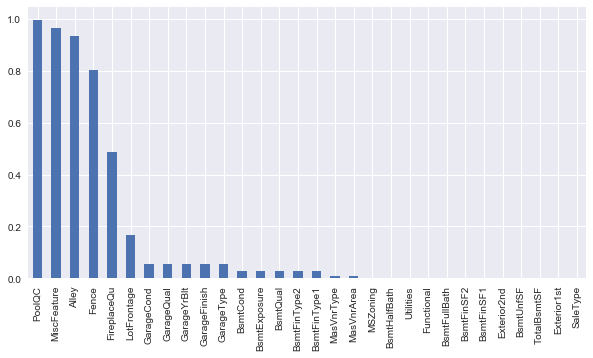

In [44]:
all_data_na.plot(kind='bar', figsize=(10, 5))

In [52]:
corrmat = train.corr()

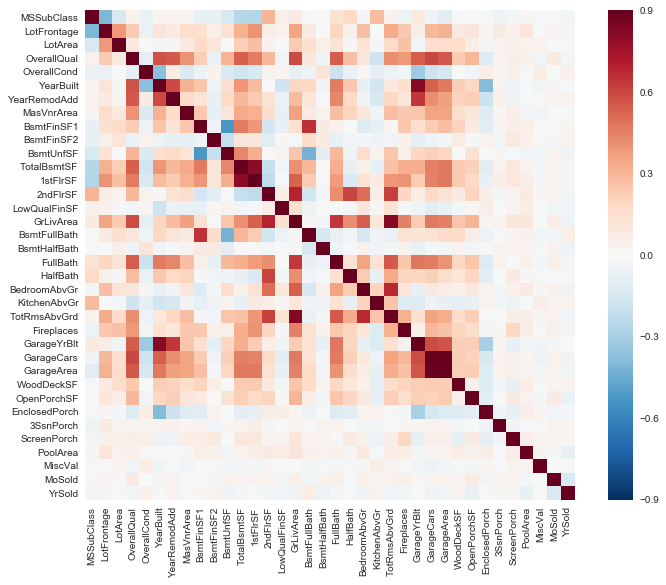

In [51]:
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, fmt="d",)

### Imputing missing values



In [54]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

In [55]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

In [56]:
all_data["Alley"] = all_data["Alley"].fillna("None")


In [57]:
all_data["Fence"] = all_data["Fence"].fillna("None")

In [58]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")


LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [67]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [68]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [69]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [70]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)


In [71]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [72]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)


In [83]:
all_data['MSZoning'] = all_data['MSZoning'].fillna('RL')

In [87]:
all_data.drop('Utilities', inplace=True, axis=1)

In [90]:
all_data['Functional'].fillna('Typ', inplace=True)

In [93]:
all_data['Electrical'].fillna('SBrkr', inplace=True)

In [96]:
all_data['KitchenQual'].fillna('TA', inplace=True)

In [102]:
all_data['Exterior2nd'].fillna('VinylSd', inplace=True)

In [105]:
all_data['Exterior1st'].fillna('VinylSd', inplace=True)

In [109]:
all_data['SaleType'].fillna(all_data.SaleType.mode()[0], inplace=True)

In [110]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")


In [118]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 78 columns):
MSSubClass       2917 non-null int64
MSZoning         2917 non-null object
LotFrontage      2917 non-null float64
LotArea          2917 non-null int64
Street           2917 non-null object
Alley            2917 non-null object
LotShape         2917 non-null object
LandContour      2917 non-null object
LotConfig        2917 non-null object
LandSlope        2917 non-null object
Neighborhood     2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
BldgType         2917 non-null object
HouseStyle       2917 non-null object
OverallQual      2917 non-null int64
OverallCond      2917 non-null int64
YearBuilt        2917 non-null int64
YearRemodAdd     2917 non-null int64
RoofStyle        2917 non-null object
RoofMatl         2917 non-null object
Exterior1st      2917 non-null object
Exterior2nd      2917 non-null object
MasVnrType       2917 no

In [120]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [135]:
cols1 = all_data.columns[all_data.dtypes == 'object'].values

In [136]:
len(cols1)

46

In [134]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

In [139]:
for c in cols:
    label_encoder = LabelEncoder()
    all_data[c] = label_encoder.fit_transform(all_data[c])

In [140]:
print('Shape all_data: {}'.format(all_data.shape))


Shape all_data: (2917, 78)


In [141]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']


## Skewed features



In [142]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


In [143]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


In [144]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [148]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [147]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb


In [253]:
from sklearn.model_selection import cross_val_score

n_folds = 5
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.mean(np.sqrt(-cross_val_score(estimator=model, cv=kf, X=train, y=y_train, scoring='neg_mean_squared_error')))
    return rmse
    

In [254]:
from sklearn.model_selection import GridSearchCV

# linear model

## lasso

In [158]:
lasso = Lasso()
params = {'alpha': [0.001, 0.0001, 0.01,]}

In [159]:
clf = GridSearchCV(estimator=lasso, param_grid=params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=1)

In [160]:
clf.fit(train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.4s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.001, 0.0001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=1)

In [161]:
clf.best_params_

{'alpha': 0.001}

In [162]:
clf.best_score_

-0.013752935076792273

In [255]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0001
                                            ,random_state=1))

In [256]:
rmse_cv(lasso)

0.11154335005089271

In [227]:
lasso.fit(train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [228]:
prediction = lasso.predict(test)

In [230]:
prediction = np.exp(prediction) - 1

In [231]:
prediction

array([ 118516.64833452,  153449.90061561,  184710.37396746, ...,
        174253.19696177,  117416.01617848,  226390.59454732])

In [235]:
result = pd.DataFrame({"Id": test_id, 'SalePrice': prediction})
result.to_csv('./submit1.csv', index=False)

## ElasticNet

In [192]:
elastic = ElasticNet()
params = {'alpha':  [0.0005],
         'l1_ratio': [0.5, 1.0,]}
clf = GridSearchCV(estimator=elastic, cv=5, n_jobs=-1, param_grid=params, scoring='neg_mean_squared_error')

In [193]:
clf.fit(train, y_train)

/Users/gjwei/anaconda/lib/python2.7/site-packages/sklearn/metrics/regression.py:232: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


GridSearchCV(cv=5, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.0005], 'l1_ratio': [0.5, 1.0, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [194]:
clf.best_score_

-0.012925236181902312

In [195]:
clf.best_params_

{'alpha': 0.0005, 'l1_ratio': 1.0}

In [257]:
enet = make_pipeline(RobustScaler(), ElasticNet(**clf.best_params_))

In [258]:
rmse_cv(enet)

0.11154335005089271

In [259]:
KRR = KernelRidge(alpha=1, kernel='polynomial', degree=2, coef0=2.5)

In [260]:
score = rmse_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Kernel Ridge score: 0.1149 (0.0000)



# GBDT

In [263]:
GBoost = GradientBoostingRegressor(n_estimators=4000, learning_rate=0.05,
                                   max_depth=3, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [264]:
rmse_cv(GBoost)

0.11644482120616402

In [267]:
GBoost.fit(train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=15,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             n_estimators=4000, presort='auto', random_state=5,
             subsample=1.0, verbose=0, warm_start=False)

In [268]:
predictions = GBoost.predict(test)

In [269]:
predictions = np.expm1(predictions)

In [271]:
result = pd.DataFrame({"Id": test_id, 'SalePrice': predictions})

In [273]:
result.to_csv('./result2.csv', index=False)

In [270]:
predictions

array([ 132014.26195373,  163459.79912314,  197436.87940736, ...,
        158891.70851917,  111494.79228062,  212194.81391574])


# XGboost

ImportError: No module named polylearn

In [282]:
# save train and test

In [310]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.7, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=3000,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [311]:
rmse_cv(model_xgb)

0.1162455268695944

In [313]:
model_xgb.fit(train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.0468, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1.7817,
       missing=None, n_estimators=3000, n_jobs=1, nthread=-1,
       objective='reg:linear', random_state=7, reg_alpha=0.464,
       reg_lambda=0.8571, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.5213)

# SVM`m

In [320]:
from sklearn.svm import SVR

In [347]:
svr = SVR(kernel='linear')

In [348]:
params = {"C": [ 2.0, 10, 100],
        }

In [349]:
rmse_cv(svr)

0.1255623578327377

In [350]:
gs = GridSearchCV(estimator=svr, cv=3, param_grid=params, n_jobs=-1, scoring='neg_mean_squared_error')

# lightbpm

In [ ]:
import lightgbm